Factor for THERMAL is 2.231714196709538e+19
(n,elastic) rate: 37.89861881538382 +/- 0.007756202917132998
(n,inelastic) rate: 0.005964018191695844 +/- 2.261900955944206e-06
(n,2n) rate: 0.0007194010778796661 +/- 3.402305073353395e-06
(n,na) rate: 0.000989952433585478 +/- 3.5546020770673265e-06
(n,np) rate: 1.0015951496152964e-05 +/- 2.0305907881200248e-07
(n,$\gamma$) rate: 0.4213310849732571 +/- 0.00013891798834245468
(n,p) rate: 0.0004732819388674466 +/- 1.1572670081818593e-06
(n,d) rate: 1.2291010516666295e-05 +/- 9.655690048922396e-08
(n,t) rate: 0.002831718265994435 +/- 1.2428705812676964e-06
(n,a) rate: 0.0035957509520337643 +/- 4.824324597217825e-06
Factor for SEMIEPITHERMAL is 2.390646344346472e+19


/tmp/ipykernel_15662/625397978.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15662/625397978.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15662/625397978.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15662/625397978.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15662/625397978.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15662/625397978.py:66: FutureWarnin

(n,elastic) rate: 34.56768061133807 +/- 0.006881198532688994
(n,inelastic) rate: 0.010912166684753886 +/- 3.360360286019202e-06
(n,2n) rate: 0.0009009271192720817 +/- 3.9585272013695336e-06
(n,na) rate: 0.0014482712745900557 +/- 5.3583020742495746e-06
(n,np) rate: 1.1424571447600734e-05 +/- 2.2632927903192988e-07
(n,$\gamma$) rate: 0.453519975840667 +/- 0.0001568434512353905
(n,p) rate: 0.0005150495838032066 +/- 1.1771551416048674e-06
(n,d) rate: 1.7471836391853867e-05 +/- 1.3983320867289e-07
(n,t) rate: 0.0025345048686784984 +/- 1.2455724584621916e-06
(n,a) rate: 0.0052972919995023324 +/- 6.97080902637511e-06
Factor for EPITHERMAL is 3.132901117009681e+19
(n,elastic) rate: 35.89319707543812 +/- 0.006132175801503513
(n,inelastic) rate: 0.019031562563869665 +/- 4.624311023149149e-06
(n,2n) rate: 0.0011211627021212502 +/- 4.6004973251143695e-06
(n,na) rate: 0.001995878171174413 +/- 7.328550268049586e-06
(n,np) rate: 1.369969716022684e-05 +/- 2.505775120030575e-07
(n,$\gamma$) rate: 0.568

/tmp/ipykernel_15662/625397978.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15662/625397978.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15662/625397978.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15662/625397978.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15662/625397978.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15662/625397978.py:66: FutureWarnin

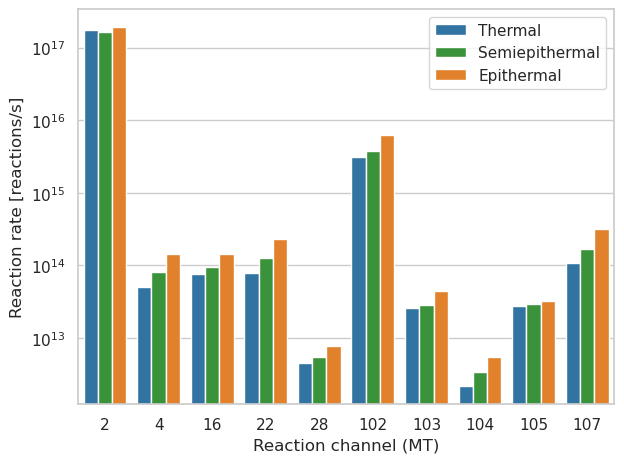

In [3]:
import openmc
import matplotlib.pyplot as plt
import os
import sys
TOOLS_PATH = f"{os.getenv('MASTER_PROJECT_ROOT_FOLDER')}/logistics"
sys.path.insert(0, TOOLS_PATH)
from tools import run_tools, nuclear_data_tools, model_tools, endf_tools
import pandas as pd

import seaborn as sns
sns.set(style="whitegrid")

results_idx = {
    model_tools.THERMAL_REACTOR: 1,
    model_tools.SEMIEPITHERMAL_REACTOR: 2,
    model_tools.EPITHERMAL_REACTOR: 3,
}

f_factors = { # From plot_flux.ipynb in R20, its the f factors
    1: 2.231714196709538e+19,
    2: 2.390646344346472e+19,
    3: 3.132901117009681e+19
}

colors = ["tab:blue", "tab:green", "tab:orange"] 

folder_filename = lambda run_id: f"../results/RUNDATA_R19_{run_id}"

df = pd.DataFrame()

for REACTOR_MODEL, i in results_idx.items():
    run_settings = run_tools.load_run_settings_json(folder_filename(i))
    color = colors[i-1]

    f_factor = f_factors[i]
    print(f"Factor for {REACTOR_MODEL} is {f_factor}")

    # Make sure reactor_model is correct
    assert run_settings["reactor_model"] == REACTOR_MODEL

    statepoint_number = run_settings["active_batch_count"] + run_settings["inactive_batch_count"]
    sp = openmc.StatePoint(f"../results/RUNDATA_R19_{i}/statepoint.{statepoint_number}.h5")

    # print(sp.tallies)

    tallydf1=sp.tallies[3].get_pandas_dataframe()
    # print(tallydf1.head())


    for score in ["2", "4", "16", "22", "28", "102", "103", "104", "105", "107"]:
        # Get label:
        label = endf_tools.MT_to_label(int(score), short=True)
        # Overwrites as OpenMC has different labling standards
        if score == "4": label = "(n,level)"
        if score == "102": label = "(n,gamma)"

        real_label = endf_tools.MT_to_label(int(score), short=True)

        tallydf1reactionrate=tallydf1[tallydf1['score']==label]
        rate = tallydf1reactionrate["mean"].values[0]
        rate_std = tallydf1reactionrate["std. dev."].values[0]

        print(f"{real_label} rate: {rate} +/- {rate_std}")

        # Add to dataframe
        df = df.append({
            "REACTOR_MODEL": REACTOR_MODEL.capitalize(),
            "MT": score,
            "real_label": real_label,
            "rate": rate*f_factor,
            "rate std": rate_std*f_factor,
        }, ignore_index=True)

    
g = sns.barplot(df, x="MT", y="rate std", hue="REACTOR_MODEL", palette=colors)
g.set_yscale("log")
_ = g.set(xlabel="Reaction channel (MT)", ylabel="Reaction rate [reactions/s]")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig("reaction_rates_per_MT.pdf")